# Economic Data Analysis with Python

In [31]:
# Install Fred API
%pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import os


# Default styling for plots
plt.style.use('fivethirtyeight')
color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Set pandas display options
pd.set_option('display.max_columns', 500)

# Import Fred API
from fredapi import Fred


In [2]:
# Load the environment variables from the .env file
load_dotenv()

# Access the environment variable
api_key = os.getenv('API_KEY')
if api_key:
    print(f"API Key okay.")
else:
    print("API Key not found.")


NameError: name 'load_dotenv' is not defined

## Create the FRED Object

In [34]:
fred = Fred(api_key = api_key)

## Search

In [35]:
sp_results = fred.search("S&P", order_by="popularity")
sp_results


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-04,2024-06-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-04 08:54:02-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-04,2024-06-04,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-04,2024-06-04,S&P 500,2014-06-04,2024-06-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-03 19:11:00-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-04,2024-06-04,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-04,2024-06-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-04 08:54:06-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-06-04,2024-06-04,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-06-04,2024-06-04,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:51-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-06-04,2024-06-04,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


## Pull Raw Data

<Axes: title={'center': 'S&P 500 Index Price'}>

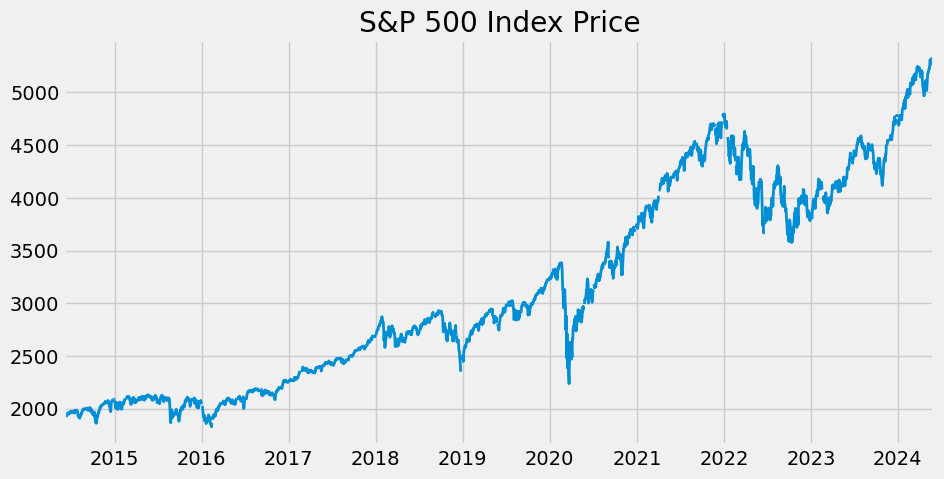

In [36]:
sp500 = fred.get_series(series_id = 'SP500') 
# Returns a Pandas Series. Index as a DateTime and values as the S&P 500 index price.

# Plot the S&P 500 index price
sp500.plot(figsize = (10, 5), title = 'S&P 500 Index Price', lw = 2)


## Pull and Join Multiple Datasets

In [37]:
unemployment_results = fred.search('unemployment')

In [38]:
unemployment_rate = fred.get_series('UNRATE')

<Axes: >

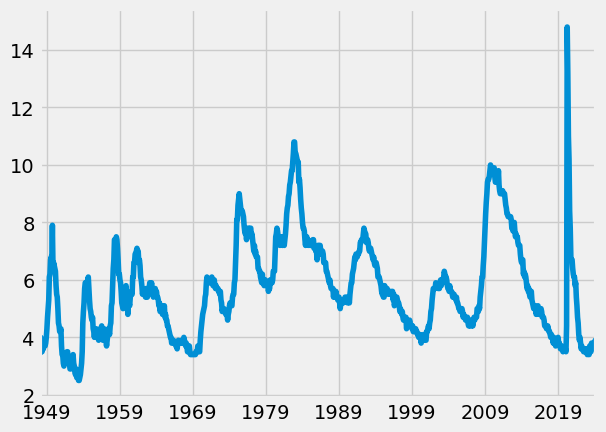

In [39]:
unemployment_rate.plot()

In [40]:
unemployment_rate_state = fred.search("unemployment rate state", filter = ("frequency", "Monthly"))

In [41]:
unemployment_rate_state.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-04,2024-06-04,Unemployment Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:01-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-04,2024-06-04,Unemployment Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-03 07:45:27-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-06-04,2024-06-04,Unemployment Rate - Black or African American,1972-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:19-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-06-04,2024-06-04,Unemployment Level,1948-01-01,2024-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-05-03 07:45:20-05:00,71,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-06-04,2024-06-04,Unemployment Rate - Black or African American,1972-01-01,2024-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-03 07:46:01-05:00,23,The series comes from the 'Current Population ...


In [42]:
unemployment_rate_state = unemployment_rate_state.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")


In [43]:
unemployment_df = unemployment_rate_state.loc[unemployment_rate_state["title"].str.contains("Unemployment Rate") ]

In [44]:
unemployment_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

Go through each of these ids and pull the series data down. It will loop through each of them and then run get_series. 

In [45]:
all_results = []

for the_id in unemployment_df.index:
    results = fred.get_series(the_id)
    results = results.to_frame(name = the_id)
    all_results.append(results)

In [46]:
# Take the results in the list and concatenate them into a single DataFrame. 
# axis = 1 to concatenate along the columns
unemployment_results = pd.concat(all_results, axis = 1).drop(["UNRATE", "M0892AUSM156SNBR", "LNS14000006", "LNS14000006", "LNS14000150", "M08311USM156SNBR", "LNS14000089", "LNS14000048", "LNS14000026", 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR', 'LASMT261982000000003', 'LASMT391746000000003', "LNS14000024", "LNS14000031",	"M0892BUSM156SNBR", "LNS14000002",	"LNS14000009",	"LNS14000003", "LNS14000001",	"LNS14027660", "LNS14027662", "LNS14024887", "LRUN64TTUSM156S", "LNS14032183",	"LNS14000012", "LNS14027659", "LNS14000060",	"LNS14000028", "LNS14000018", "LNS14000036", "LNS14000032", "LNS14200000",	"LRUN24TTUSM156S",	"LNS14027689",	"LNS14100000",	"LNS14000315",	"LNS14000029",	"LRHUTTTTUSM156S",	"LNS14024230",	"LNS14000025",	"LNS14000061",	"LRUNTTTTUSM156S",	"LRUN25TTUSM156S", "U2RATE"] , axis = 1)

Some don't have the values for the same dates, they will be filled with Null values for those dates.

In [47]:
unemployment_results = unemployment_results.dropna()

In [48]:
# Change the column names to the state names for better readability in plot
state_names = unemployment_df["title"].str.replace("Unemployment Rate in ", "").to_dict()
unemployment_results.columns = [state_names[i] for i in unemployment_results.columns]

## Plot the unemplyment rate of the states

In [49]:
px.line(unemployment_results, title = "Unemployment Rate by State")

## Pull May 2020 unemployment rate per state

<Axes: title={'center': 'Unemployment Rate by State on May 2020'}>

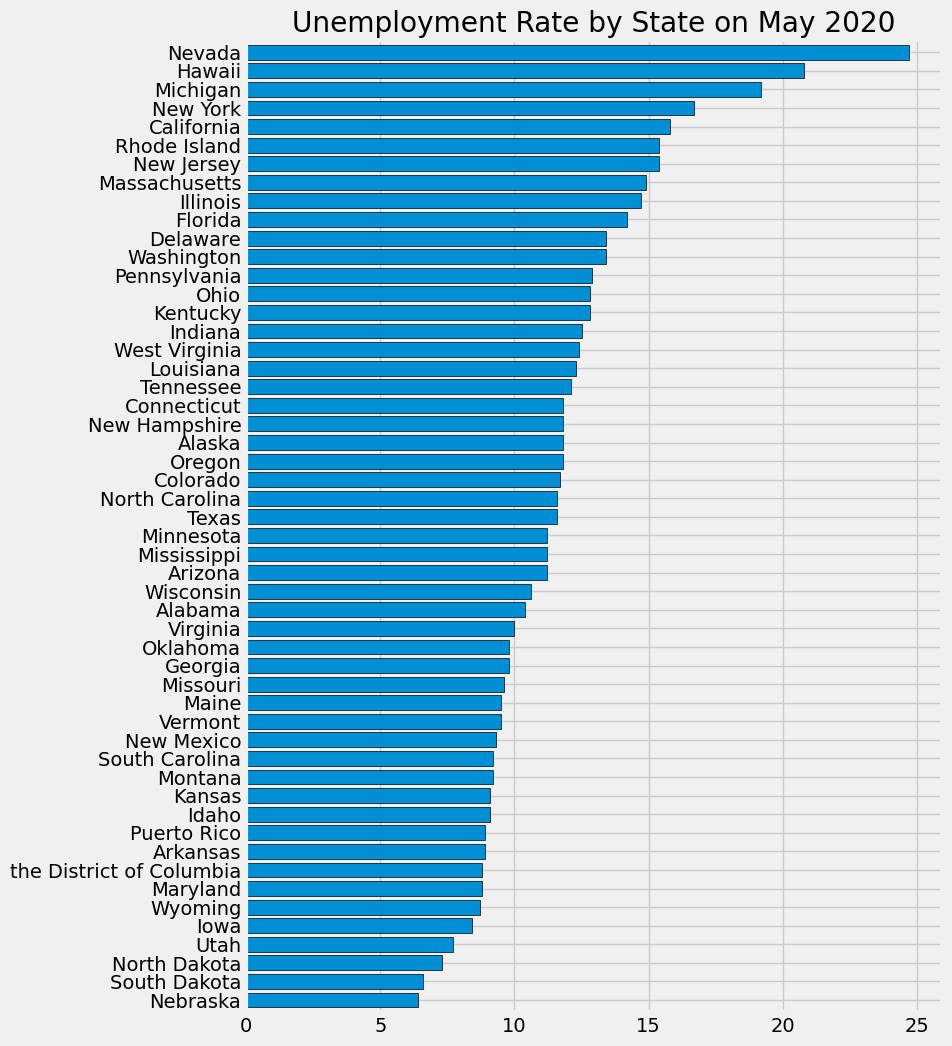

In [50]:
unemployment_results.loc[unemployment_results.index == "2020-05-01"].T \
  .sort_values("2020-05-01") \
  .plot(kind="barh", figsize=(8, 12), width = 0.8, edgecolor= "black", title="Unemployment Rate by State on May 2020", legend=False, color=color_palette[0])

## Pull Participation Rate

In [51]:
participation_df = fred.search("participation rate state", filter = ("frequency", "Monthly"))
participation_df = participation_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [52]:
participation_df.shape

(109, 15)

In [53]:
participation_id_to_state = participation_df["title"].str.replace("Labor Force Participation Rate for ", "").to_dict()

In [54]:
participation_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-06-04,2024-06-04,Labor Force Participation Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:17-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-06-04,2024-06-04,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:21-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-06-04,2024-06-04,Labor Force Participation Rate - Women,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:26-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-06-04,2024-06-04,Labor Force Participation Rate - Men,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:26-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-06-04,2024-06-04,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:31-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2024-06-04,2024-06-04,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-15 13:52:46-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64MAUSM156S,LRIN64MAUSM156S,2024-06-04,2024-06-04,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-15 13:52:51-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64FEUSM156S,LRIN64FEUSM156S,2024-06-04,2024-06-04,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-15 13:52:51-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...


In [55]:
filtered_ids = []

for index, row in participation_df.iterrows():
  if "Labor Force Participation Rate for " not in row['title']:
    filtered_ids.append(row['id'])

In [56]:
all_results = []

for the_id in participation_df.index:
    results = fred.get_series(the_id)
    results = results.to_frame(name = the_id)
    all_results.append(results)

In [57]:
participation_results = pd.concat(all_results, axis = 1).drop(filtered_ids, axis = 1)

In [58]:
participation_results.columns = [participation_id_to_state[i] for i in participation_results.columns]

In [30]:
participation_results

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,62.1,57.4,61.5,62.3,53.8,64.2,59.5,56.9,61.8,65.9,62.3,64.9,68.0,65.1,55.2,59.5,59.3,64.5,60.7,61.5,58.6,57.2,68.3,69.4,66.5,63.2,63.1,64.8,67.5,65.3,64.3,62.2,57.3,62.7,57.5,63.1,68.9,60.1,62.8,63.0,62.4,65.1,65.0,64.3,69.0,67.9,66.3,63.7,72.0,60.8,63.6
2024-01-01,62.1,57.4,61.4,62.3,53.8,64.1,59.4,56.9,61.8,65.9,62.4,64.9,68.0,65.1,55.3,59.5,59.3,64.6,60.7,61.4,58.7,57.2,68.1,69.3,66.6,63.0,63.1,64.6,67.3,65.2,64.1,62.2,57.3,62.6,57.5,63.2,68.8,60.0,62.8,63.0,62.5,65.2,65.1,64.4,69.0,67.8,66.2,63.9,72.1,60.6,63.3
2024-02-01,62.1,57.4,61.4,62.2,53.7,64.1,59.4,56.9,61.8,65.7,62.5,64.8,67.9,65.0,55.2,59.5,59.3,64.6,60.7,61.4,58.7,57.1,68.1,69.2,66.6,62.8,63.1,64.5,67.2,65.1,64.0,62.2,57.2,62.6,57.4,63.2,68.7,60.0,62.8,63.0,62.6,65.2,65.3,64.5,68.9,67.8,66.1,64.1,72.3,60.5,63.1
2024-03-01,62.0,57.4,61.4,62.3,53.7,64.1,59.4,56.9,61.8,65.6,62.7,64.9,68.0,65.0,55.2,59.6,59.3,64.6,60.6,61.4,58.7,57.1,68.0,69.0,66.5,62.6,63.1,64.5,67.0,65.1,63.9,62.2,57.2,62.6,57.4,63.2,68.7,59.9,62.7,62.9,62.8,65.3,65.4,64.6,68.9,67.7,66.1,64.4,72.6,60.3,63.0


## Plot Participation Rate and Unemployment Rate

Text(0.5, 1.0, 'New York')

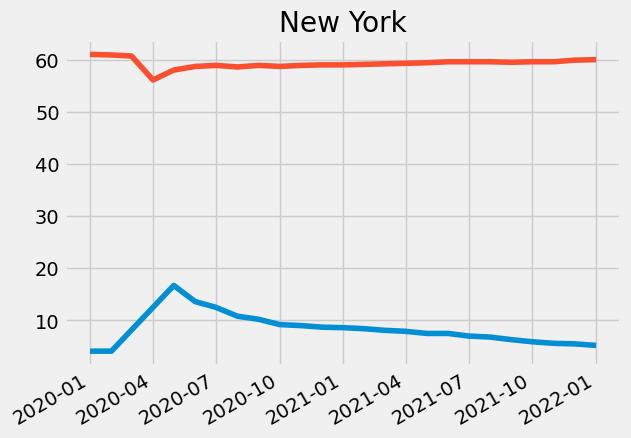

In [87]:
fig, ax = plt.subplots()
unemployment_results.query("index >= 2020 and index <= 2022")["New York"].plot(ax = ax, label = "Unemployment")
participation_results.query("index >= 2020 and index <= 2022")["New York"].plot(ax = ax, label = "Participation", color = color_palette[1])
ax.set_title("New York")